<a href="https://colab.research.google.com/github/administer03/bot_trade_using_machine_learning/blob/main/bot_trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#install ta-lib

<!-- https://github.com/mrjbq7/ta-lib 

    https://colab.research.google.com/drive/1xGx21E4oafx4WQbOCSPtQsxkD-ruMdK-#scrollTo=Xel_cHI7s40J
    
-->

In [ ]:
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 

In [ ]:
# !tar xvzf ta-lib-0.4.0-src.tar.gz

In [ ]:
# import os
# os.chdir('ta-lib') # Can't use !cd in co-lab

In [ ]:
# !./configure --prefix=/usr

In [ ]:
# !make

In [ ]:
# !make install

In [ ]:
# os.chdir('../')

In [ ]:
# !ls

In [ ]:
# !pip install TA-Lib

#Content

In [ ]:
# !pip install ccxt

In [ ]:
import ccxt
import numpy as np
# import talib as ta
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import plotly.graph_objects as go
import time

In [ ]:
coin_symbol = 'DOGE/USDT'
time_frame = '15m'
length_candle = 500

In [ ]:
api_key = "Your api here"
secret_key = "Your key here"
bi = ccxt.binance({'apiKey': api_key,
                  'secret': secret_key, 
                  })

In [ ]:
# r = ftx.fetch_ohlcv('BTC/USD','4h',None,20)# TF 4H ย้อนหลัง 20 ชุด
data = bi.fetch_ohlcv(coin_symbol, time_frame, None, length_candle)
header = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']
df = pd.DataFrame(data, columns=header)

change time format

In [ ]:
# df['Date']=(pd.to_datetime(df['Timestamp'],unit='ms')) 

In [ ]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='ms') + datetime.timedelta(hours=7) #GM +7

In [ ]:
# for i in range(len(df['Timestamp'])):
#     df['Timestamp'][i] = df['Timestamp'].values[i]/1000
#     df['Timestamp'][i] = pd.Timestamp(df['Timestamp'][i], unit='s')

In [ ]:
df

,Timestamp,Open,High,Low,Close,Volume,Date
0,1622685600000,0.41160,0.41521,0.40801,0.41499,30930320.1,2021-06-03 09:00:00
1,1622686500000,0.41496,0.41700,0.41265,0.41301,22683098.3,2021-06-03 09:15:00
2,1622687400000,0.41297,0.41678,0.40978,0.41648,34798181.1,2021-06-03 09:30:00
3,1622688300000,0.41647,0.42255,0.41417,0.42135,51799923.5,2021-06-03 09:45:00
4,1622689200000,0.42136,0.42684,0.41900,0.42621,49132640.5,2021-06-03 10:00:00
...,...,...,...,...,...,...,...
495,1623131100000,0.32006,0.32496,0.31994,0.32401,30583555.2,2021-06-08 12:45:00
496,1623132000000,0.32401,0.32525,0.32100,0.32202,21477533.0,2021-06-08 13:00:00
497,1623132900000,0.32202,0.32301,0.32000,0.32157,16169072.1,2021-06-08 13:15:00
498,1623133800000,0.32157,0.32631,0.32092,0.32306,22305277.2,2021-06-08 13:30:00


In [ ]:
rc_df = df

#Candle

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     low = df['Low'],
                                     high = df['High'],
                                     close = df['Close'],
                                     open = df['Open'],
                                     increasing_line_color = 'green',
                                     decreasing_line_color = 'red')])
fig.show()

#EMA

In [ ]:
EMA10 = df.Close.ewm(span=10, adjust=False).mean()
EMA50 = df.Close.ewm(span=50, adjust=False).mean()
EMA200 = df.Close.ewm(span=200, adjust=False).mean()

In [ ]:
#record EMA
rc_df['EMA10'] = EMA10
rc_df['EMA50'] = EMA50
rc_df['EMA200'] = EMA200

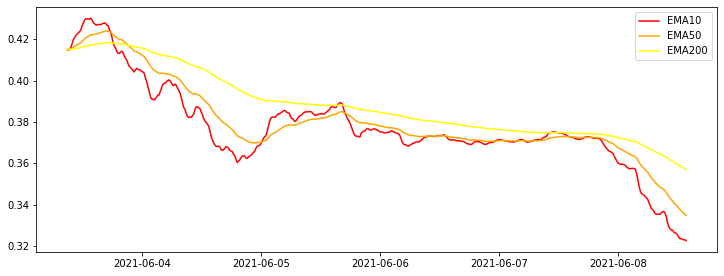

In [ ]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.Date, EMA10, label = 'EMA10', color='red')
plt.plot(df.Date, EMA50, label='EMA50', color='orange')
plt.plot(df.Date, EMA200, label='EMA200', color='yellow')
plt.legend()
# plt.legend(loc='upper left')

#MACD

In [ ]:
shortEMA = df.Close.ewm(span=12, adjust=False).mean()
longEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = shortEMA - longEMA
signal = MACD.ewm(span=9, adjust=False).mean()

In [ ]:
#record MACD
rc_df['MACD'] = MACD
rc_df['SIGNAL'] = signal

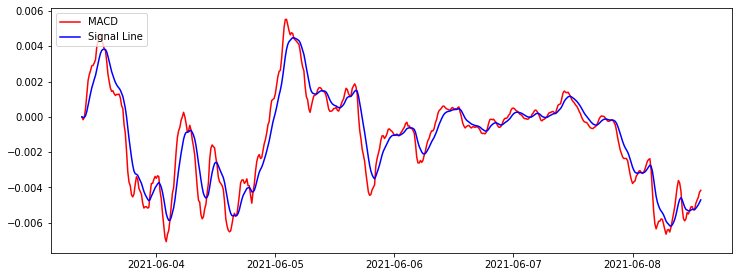

In [ ]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.Date, MACD, label = 'MACD', color='red')
plt.plot(df.Date, signal, label='Signal Line', color='blue')
plt.legend(loc='upper left')

In [ ]:
# df['MACD'] = ta.MACD(df['Close'])
# df['MACD_SIGNAL'] = ta.MACDSIGNAL(df['Close'])
# df[['Close', 'MACD']].plot(label = "Close Price", figsize=(15, 8))
# plt.grid(True)
# plt.legend()
# plt.show()

In [ ]:
# moving_average = ta.SMA(df['Close'], timeperiod=20)

In [ ]:
# #close price
# plt.figure(figsize=(12.2, 4.5))
# plt.plot(df.Date, df['Close'], label='Close')
# plt.title('Close Price')
# plt.xlabel('Date')
# plt.ylabel('Price in USDT')
# plt.grid(True)
# plt.show()

#RSI

In [ ]:
#Calulate RSI
time_preiod = 9

delta = df['Close'].diff()
delta = delta.dropna()

up = delta.copy()
up[ up < 0 ] = 0
up = pd.Series.ewm(up, alpha=1/time_preiod).mean()

down = delta.copy()
down[ down > 0 ] = 0
down *= -1
down = pd.Series.ewm(down, alpha=1/time_preiod).mean()

# rsi = np.where(up == 0, 0, np.where(down == 0, 100, 100 - (100 / (1 + up / down))))
RSI = round(   (100.0 - (100.0 / (1.0 + (up / down)))), 2    )

# RSI = np.round(rsi, 2)
# RSI = np.reshape(-1,1)
# RSI = pd.DataFrame.from_records(RSI)

In [ ]:
# #Calulate RSI
# delta = df['Close'].diff(1)
# delta = delta.dropna()
# up = delta.copy()
# down = delta.copy()
# up[ up <= 0 ] = 0
# down[ down > 0 ] = 0
# time_preiod = 9
# AVG_Gain = up.rolling(window=time_preiod).mean()
# AVG_Loss = abs(down.rolling(window=time_preiod).mean())
# RS = AVG_Gain / AVG_Loss
# RSI = 100.0 - (100.0 / (1.0 + RS))

In [ ]:
type(RSI)

pandas.core.series.Series

In [ ]:
RSI

1       0.00
2      66.35
3      83.56
4      89.56
5      91.29
       ...  
495    45.54
496    41.77
497    40.91
498    45.12
499    40.19
Name: Close, Length: 499, dtype: float64

RSI ตัวนี้ +- 5 จุด

In [ ]:
delta_chg = 6.5
for i in range(1,length_candle-1):
  if RSI.iloc[i] < 40 and RSI.iloc[i] != 0.0:
    RSI.iloc[i] = (RSI.iloc[i]) + delta_chg
  elif RSI.iloc[i] > 60 and RSI.iloc[i] != 0.0:
    RSI.iloc[i] = (RSI.iloc[i]) - delta_chg

In [ ]:
RSI[-10:]

490    41.32
491    41.90
492    44.11
493    39.43
494    41.72
495    45.54
496    41.77
497    40.91
498    45.12
499    40.19
Name: Close, dtype: float64

In [ ]:
rc_df['RSI'] = RSI

In [ ]:
# plt.figure(figsize=(12.2, 4.5))
# RSI.plot()
# plt.show()

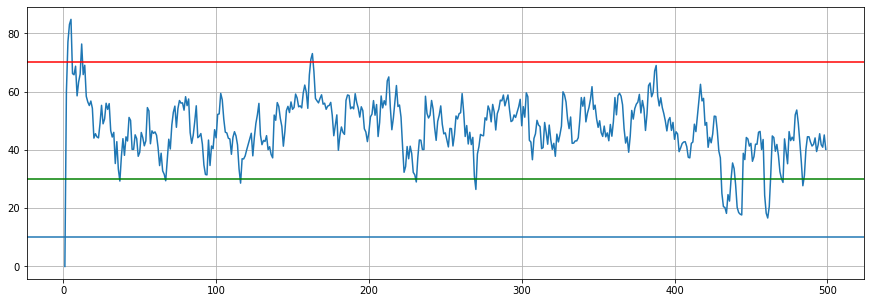

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax0 = RSI.plot(ax=ax)
ax0.axhline(30, color='green')
ax0.axhline(10)
ax0.axhline(70, color='red')
# ax0.set_xticklabels(df.Date, rotation=0)
plt.grid(True)

#Record Data for traing dataset

In [ ]:
rc_df

,Timestamp,Open,High,Low,Close,Volume,Date,EMA10,EMA50,EMA200,MACD,SIGNAL,RSI
0,1622685600000,0.41160,0.41521,0.40801,0.41499,30930320.1,2021-06-03 09:00:00,0.414990,0.414990,0.414990,0.000000,0.000000,NaN
1,1622686500000,0.41496,0.41700,0.41265,0.41301,22683098.3,2021-06-03 09:15:00,0.414630,0.414912,0.414970,-0.000158,-0.000032,0.00
2,1622687400000,0.41297,0.41678,0.40978,0.41648,34798181.1,2021-06-03 09:30:00,0.414966,0.414974,0.414985,-0.000003,-0.000026,59.85
3,1622688300000,0.41647,0.42255,0.41417,0.42135,51799923.5,2021-06-03 09:45:00,0.416127,0.415224,0.415049,0.000507,0.000081,77.06
4,1622689200000,0.42136,0.42684,0.41900,0.42621,49132640.5,2021-06-03 10:00:00,0.417960,0.415655,0.415160,0.001288,0.000322,83.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1623131100000,0.32006,0.32496,0.31994,0.32401,30583555.2,2021-06-08 12:45:00,0.323653,0.337128,0.358426,-0.004907,-0.005183,45.54
496,1623132000000,0.32401,0.32525,0.32100,0.32202,21477533.0,2021-06-08 13:00:00,0.323356,0.336535,0.358063,-0.004724,-0.005091,41.77
497,1623132900000,0.32202,0.32301,0.32000,0.32157,16169072.1,2021-06-08 13:15:00,0.323031,0.335948,0.357700,-0.004563,-0.004985,40.91
498,1623133800000,0.32157,0.32631,0.32092,0.32306,22305277.2,2021-06-08 13:30:00,0.323036,0.335443,0.357356,-0.004266,-0.004842,45.12


df to excel

In [ ]:
# drop column
rc_df.drop(rc_df.columns[[0,1,2,3]], axis=1, inplace=True)

In [ ]:
file_name = coin_symbol[:4]+ '_' + time_frame + '_' + str(length_candle) + '.csv'
rc_df = rc_df.fillna(0)
rc_df.to_csv(file_name, encoding='utf-8', index=False)

#Making Machine Learning

pre-processing

In [ ]:
file1000 = '/content/drive/MyDrive/Colab Notebooks/CSV/bottrade/DOGE_15m_1000_ver2.csv'
data = pd.read_csv(file1000)

In [ ]:
data

,Date,EMA10,EMA50,EMA200,MACD,SIGNAL,RSI,Volume,Close,Action
0,21/5/2021 4:00,0.403660,0.403660,0.403660,0.000000,0.000000,0.00,24896905.0,0.40366,Hold
1,21/5/2021 4:15,0.403442,0.403613,0.403648,-0.000096,-0.000019,0.00,28867445.1,0.40246,Hold
2,21/5/2021 4:30,0.404474,0.403829,0.403703,0.000362,0.000057,79.69,26386672.0,0.40912,Buy
3,21/5/2021 4:45,0.406032,0.404190,0.403795,0.001029,0.000251,84.71,49274038.7,0.41304,Buy
4,21/5/2021 5:00,0.406080,0.404273,0.403820,0.001002,0.000401,53.56,27290834.8,0.40630,Hold
...,...,...,...,...,...,...,...,...,...,...
1659,7/6/2021 10:45,0.375011,0.372376,0.374419,0.001374,0.001071,57.89,10059945.0,0.37560,Buy
1660,7/6/2021 11:00,0.375255,0.372532,0.374438,0.001402,0.001137,54.51,13331542.3,0.37635,Hold
1661,7/6/2021 11:15,0.375187,0.372624,0.374442,0.001290,0.001167,52.45,10042065.5,0.37488,Sell
1662,7/6/2021 11:30,0.375044,0.372694,0.374442,0.001150,0.001164,49.88,9208025.8,0.37440,Sell


In [ ]:
list_date = data['Date'].to_list()
# list_date

In [ ]:
print(time.mktime(time.strptime('31/5/2021 13:45', "%d/%m/%Y %H:%M")))

1622468700.0


In [ ]:
list_timestamp = [time.mktime(time.strptime(i, "%d/%m/%Y %H:%M")) for i in list_date]
        # ------------ or --------------
# list_timestamp = []
# for i in list_date:
#   temp_data = time.mktime(time.strptime(i, "%d/%m/%Y %H:%M"))
#   list_timestamp.append((temp_data)

In [ ]:
# data['timestamp'].DataFrame(list_timestamp)
data['Timestamp'] = pd.DataFrame(list_timestamp)

In [ ]:
# data

Tree model

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1664 non-null   object 
 1   EMA10      1664 non-null   float64
 2   EMA50      1664 non-null   float64
 3   EMA200     1664 non-null   float64
 4   MACD       1664 non-null   float64
 5   SIGNAL     1664 non-null   float64
 6   RSI        1664 non-null   float64
 7   Volume     1664 non-null   float64
 8   Close      1664 non-null   float64
 9   Action     1664 non-null   object 
 10  Timestamp  1664 non-null   float64
dtypes: float64(9), object(2)
memory usage: 143.1+ KB


In [ ]:
x = data[['EMA10', 'EMA50', 'EMA200', 'MACD', 'SIGNAL', 'RSI', 'Volume', 'Close', 'Timestamp']]
y = data[['Action']]

In [ ]:
X = data[['EMA10', 'EMA50', 'EMA200', 'MACD', 'SIGNAL', 'RSI', 'Volume', 'Close', 'Timestamp']]
Y = data[['Action']]

In [ ]:
train_x, test_x, train_y,  test_y =  train_test_split(x, y, train_size = 0.6, random_state = 5) # กรณีที่ใช้ ไฟล์เดียวทั้ง test และ train
# print(train_x.count())
print(train_y.count())

Action    998
dtype: int64


In [ ]:
clf = tree.DecisionTreeClassifier() #classifier
model  = clf.fit(train_x, train_y) 

TreeScore = model.score(test_x, test_y)
# print(TreeScore, KNNScore)
print('Score of Tree is %.2f' % (TreeScore*100),'%')

Score of Tree is 56.61 %


In [ ]:
text_representation = tree.export_text(clf)
# print(text_representation)

In [ ]:
y_predict= model.predict(X)
data['y_predict'] = y_predict

In [ ]:
check_df = data
# check_df

In [ ]:
check_df = check_df.drop(check_df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 10]], axis=1)

In [ ]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
check_df.loc[check_df['Action'] != check_df['y_predict']]

,Action,y_predict
6,Sell,Hold
7,Buy,Hold
11,Sell,Hold
12,Buy,Hold
23,Hold,Sell
...,...,...
1641,Hold,Sell
1645,Hold,Buy
1647,Buy,Sell
1657,Sell,Buy


In [ ]:
temp_ = check_df.loc[(check_df['Action'] == check_df['y_predict']) & (check_df['y_predict'] != 'Mute')]
index = temp_.index
number_of_rows = len(index)
temp_

,Action,y_predict
0,Hold,Hold
1,Hold,Hold
2,Buy,Buy
3,Buy,Buy
4,Hold,Hold
...,...,...
1659,Buy,Buy
1660,Hold,Hold
1661,Sell,Sell
1662,Sell,Sell


In [ ]:
(number_of_rows * 100) / length_candle

275.0

In [ ]:
temp_ = check_df.loc[(check_df['Action'] == check_df['y_predict'])]
index = temp_.index
number_of_rows = len(index)
# temp_
number_of_rows

1375

In [ ]:
(number_of_rows * 100) / length_candle

275.0

In [ ]:
# data.to_csv('backtest.csv', encoding='utf-8', index=False)

#Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# rfc=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 300, max_depth=7, criterion='gini')
rfc=RandomForestClassifier()
rfc.fit(x, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("Training set score: %f" % rfc.score(x, y))
print("Test set score: %f" % rfc.score(x, Y))

Training set score: 1.000000
Test set score: 1.000000


In [ ]:
rdscore = rfc.score(test_x, test_y)
print('Score of RF is %.2f' % (rdscore*100),'%')

Score of RF is 100.00 %


#Fetch last price

In [ ]:
def cal_last_MACD(sh, lo, si):
  shortEMA = df.Close.ewm(span=sh, adjust=False).mean()
  longEMA = df.Close.ewm(span=lo, adjust=False).mean()
  MACD = (shortEMA - longEMA)
  signal = (MACD.ewm(span=si, adjust=False).mean())
  return MACD.to_list()[-1], signal.to_list()[-1]

In [ ]:
def cal_last_RSI(span_of_candle):

  delta = df['Close'].diff()
  delta = delta.dropna()

  up = delta.copy()
  up[ up < 0 ] = 0
  up = pd.Series.ewm(up, alpha=1/span_of_candle).mean()

  down = delta.copy()
  down[ down > 0 ] = 0
  down *= -1
  down = pd.Series.ewm(down, alpha=1/span_of_candle).mean()
  RSI = round(   (100.0 - (100.0 / (1.0 + (up / down)))), 2    )

  delta_chg = 6.5
  for i in range(1,length_candle-1):
    if RSI.iloc[i] < 40 and RSI.iloc[i] != 0.0:
      RSI.iloc[i] = (RSI.iloc[i]) + delta_chg
    elif RSI.iloc[i] > 60 and RSI.iloc[i] != 0.0:
      RSI.iloc[i] = (RSI.iloc[i]) - delta_chg

  return RSI.to_list()[-1]

In [ ]:
def cal_last_EMA(span_of_candle):
  if length_candle >= span_of_candle:
    EMA_X = df.Close.ewm(span=span_of_candle, adjust=False).mean()
    return EMA_X.to_list()[-1]
  else:
    return None

In [ ]:
def print_(last_price, last_volume, EMA10_last, EMA50_last, EMA200_last, RSI_last, MACD, signal):
    print('last price: ', last_price)
    print('last Volumn: ', last_volume)
    print('****************** EMA *********************')
    print('last EMA10: ', EMA10_last)
    print('last EMA50: ', EMA50_last)
    print('last EMA200: ', EMA200_last)
    print('****************** RSI *********************')
    print('last RSI: ', RSI_last)
    print('****************** MACD ********************')
    print('last MACD: ', MACD)
    print('last signal: ', signal)
    print('--------------------------------------------\n')

In [ ]:
def time_now():
  now = datetime.datetime.now() + datetime.timedelta(hours=7) # GM+7 Thailand
  return now.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# def seconds_to_min(seconds_time):
#     return seconds_time / 60

def min_to_seconds(min):
  return min * 60

def hr_to_seconds(hr):
  return hr * 60 * 60

def day_to_seconds(day):
  pass

def week_to_seconds(week):
  pass

# print(seconds_to_min(900)) -> 15.0
# print(min_to_seconds(3))   -> 180
# print(hr_to_seconds(1))    -> 1

In [ ]:
def print_bot_processing(predict_value, last_price):
  if predict_value == 'Buy':
    print(time_now(),':', 'Buy now!!!', ':',last_price)
  elif predict_value == 'Sell':
    print(time_now(),':', 'Sell now!!!', ':',last_price)
  else:
    print(time_now(),':', 'Did not do anything', ':',last_price)

In [ ]:
timeout = hr_to_seconds(5)   # [seconds]
timeout_start = time.time()
 
coin_symbol = 'DOGE/USDT'
time_frame = '15m'
length_candle = 300
 
while time.time() < timeout_start + timeout:
 
  data = bi.fetch_ohlcv(coin_symbol, time_frame, None, length_candle)
  header = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']
  df = pd.DataFrame(data, columns=header)
 
  # last_price = bi.fetch_tickers(coin_symbol)[coin_symbol]['last'] # or
  last_price = df['Close'].to_list()[-1]
  last_volume = df['Volume'].to_list()[-1]
  last_timestamp = df['Timestamp'].to_list()[-1]
 
  EMA10_last = cal_last_EMA(10)
  EMA50_last = cal_last_EMA(50)
  EMA200_last = cal_last_EMA(200)
 
  MACD, signal = cal_last_MACD(12, 26, 9)
 
  RSI_last = cal_last_RSI(9)
 
  # print_(last_price, last_volume, EMA10_last, EMA50_last, EMA200_last, RSI_last, MACD, signal)
  list_for_prediction = [[EMA10_last, EMA50_last, EMA200_last, MACD, signal, RSI_last, last_volume, last_price, last_timestamp]]
  # print(list_for_prediction)
  y_predict = rfc.predict(list_for_prediction)
 
  print_bot_processing(y_predict, last_price)
 
  time.sleep(min_to_seconds(15)) # set delay on seconds

2021-06-08 13:59:25 : Did not do anything : 0.32057
2021-06-08 14:14:25 : Did not do anything : 0.3223
2021-06-08 14:29:25 : Buy now!!! : 0.32663
2021-06-08 14:44:25 : Did not do anything : 0.32574
2021-06-08 14:59:26 : Did not do anything : 0.32524
2021-06-08 15:14:26 : Buy now!!! : 0.32995
2021-06-08 15:29:26 : Buy now!!! : 0.33425
2021-06-08 15:44:26 : Buy now!!! : 0.33303
2021-06-08 15:59:27 : Buy now!!! : 0.32985
2021-06-08 16:14:27 : Buy now!!! : 0.32902
2021-06-08 16:29:27 : Did not do anything : 0.32716
2021-06-08 16:44:28 : Did not do anything : 0.32828
2021-06-08 16:59:28 : Sell now!!! : 0.32651
2021-06-08 17:14:28 : Buy now!!! : 0.32954
